## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [3]:
# Import the dataset
country_data = pd.read_csv('/Users/ella/Desktop/DS/Country-data.csv')
country_data.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
# Check the shape
print(country_data.shape)
# The dataset has 167 rows and 10 columns

(167, 10)


In [5]:
# Check datatypes & counts
print(country_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [6]:
# Get descriptive statistics
# I will start by retrieving the mean value for each column
mean_values = country_data.mean(numeric_only=True)
print('The mean value for each column:')
print(mean_values)

#The, I will also retrieve the median value for each column
median_values = country_data.median(numeric_only=True)
print('\nThe median value for each column:')
print(median_values)

The mean value for each column:
child_mort       38.270060
exports          41.108976
health            6.815689
imports          46.890215
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
dtype: float64

The median value for each column:
child_mort      19.30
exports         35.00
health           6.32
imports         43.30
income        9960.00
inflation        5.39
life_expec      73.10
total_fer        2.41
gdpp          4660.00
dtype: float64


In [7]:
# Identify any missing data
missing_value_count = country_data.isnull().sum()
print(missing_value_count)
# No need ot fill missing value in the dataset

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
# The only non_numeric column is 'country'
country_data.drop(['country'], axis=1, inplace=True)

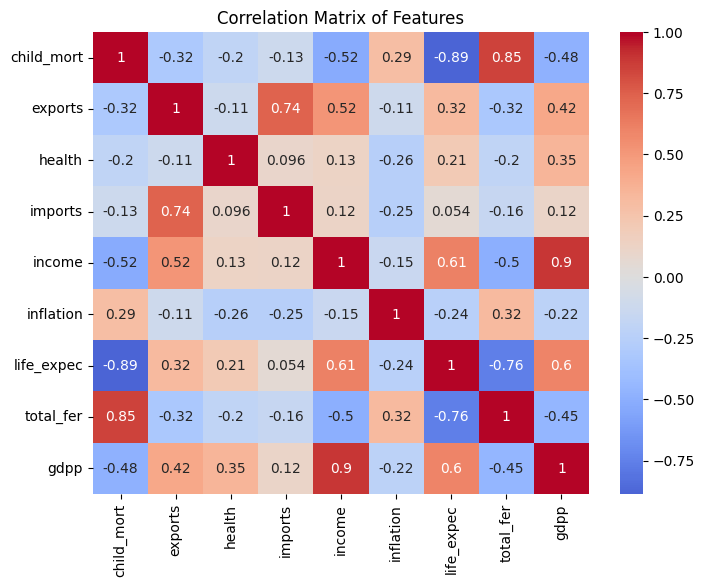

In [9]:
# Create a correlation map of features to explore relationships between features
# I will start by calculating the correlation matrix
correlation_matrix = country_data.corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.savefig('/Users/ella/Desktop/DS/correlation_matrix_of_features.png')
plt.show()

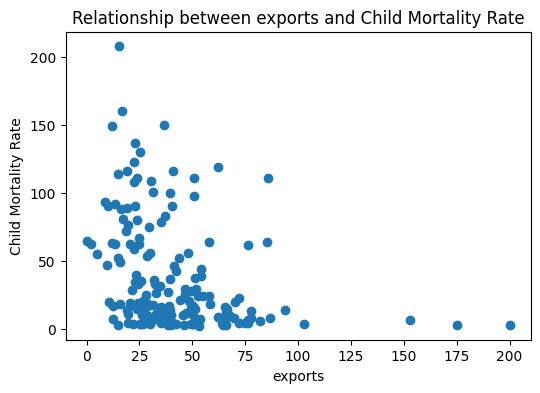

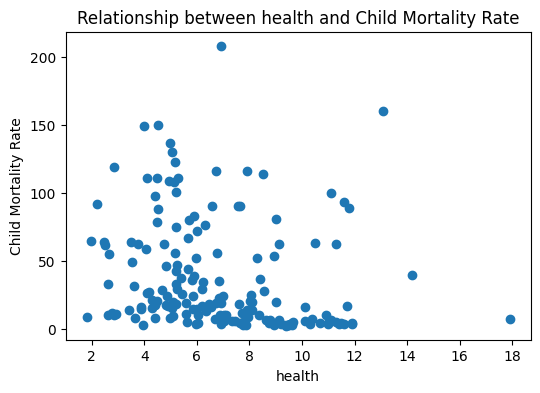

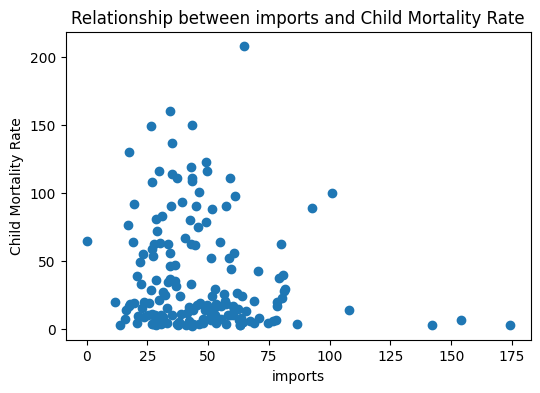

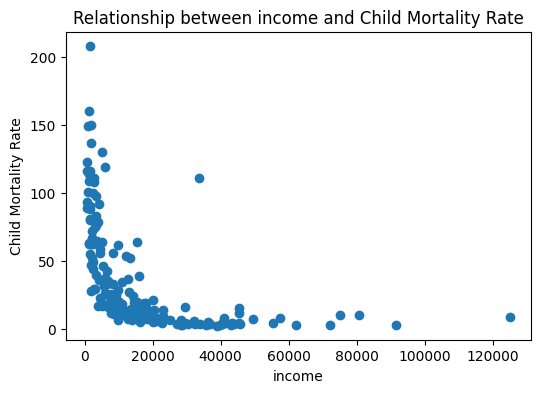

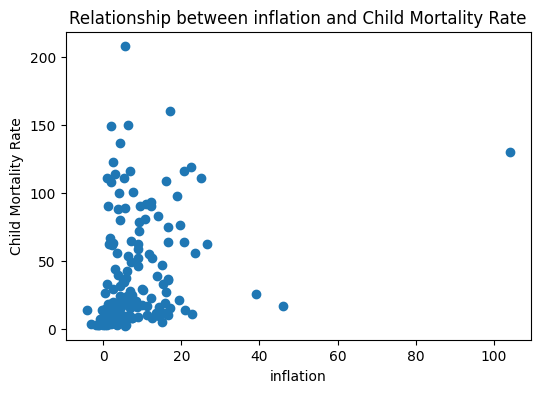

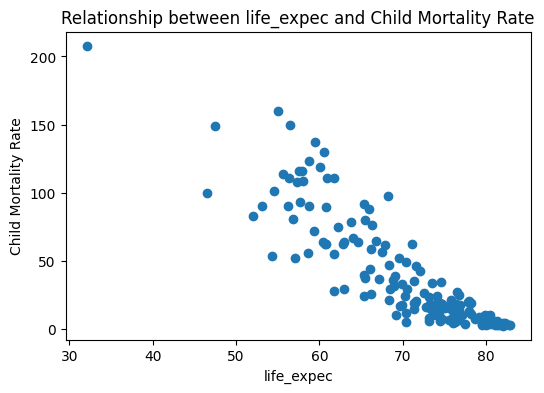

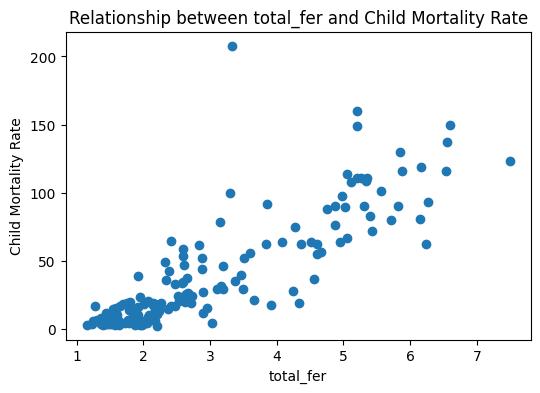

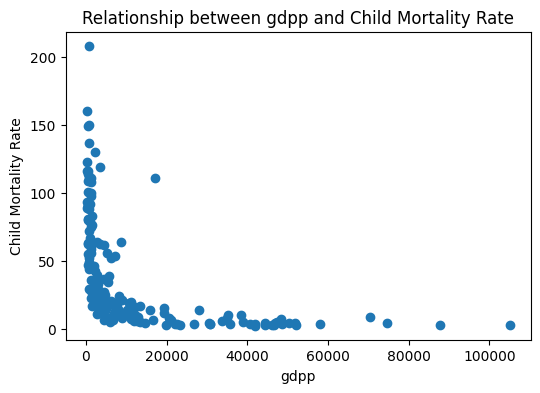

In [13]:
# Explore the continuous independent features against child_mort using scatter plots.
# Dropping the child_mort feature first
con_ind_features = country_data.drop(columns=['child_mort'])
# Creating a for loop to plot a scatter plot for each feature
for feature in con_ind_features.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(country_data[feature], country_data['child_mort'])
    plt.xlabel(feature)
    plt.ylabel('Child Mortality Rate')
    plt.title(f'Relationship between {feature} and Child Mortality Rate')
    plt.show()

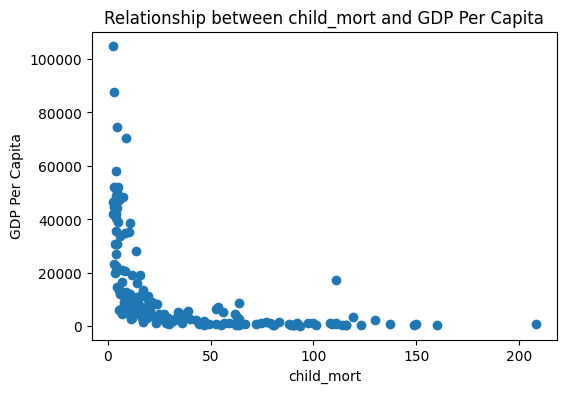

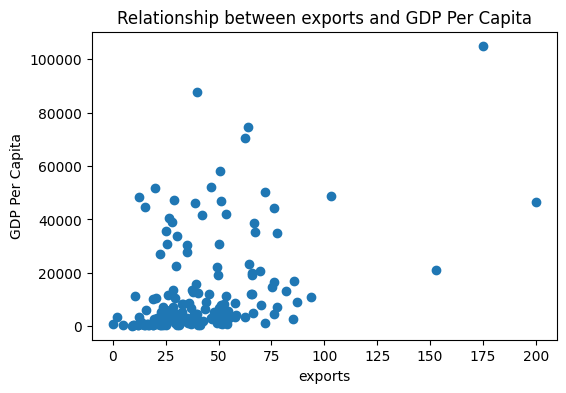

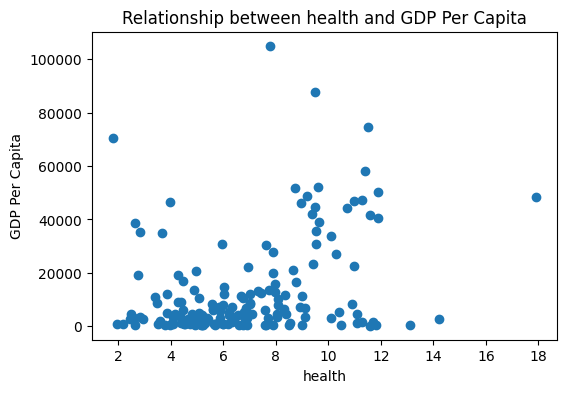

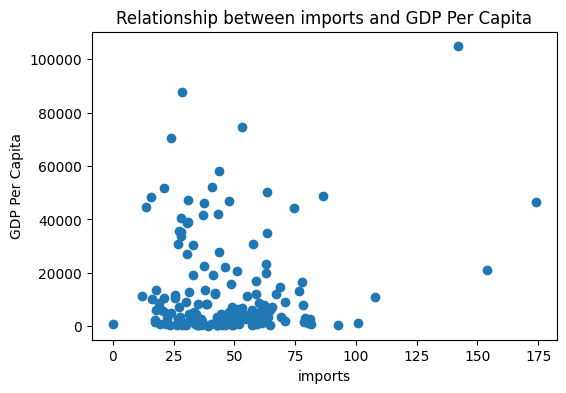

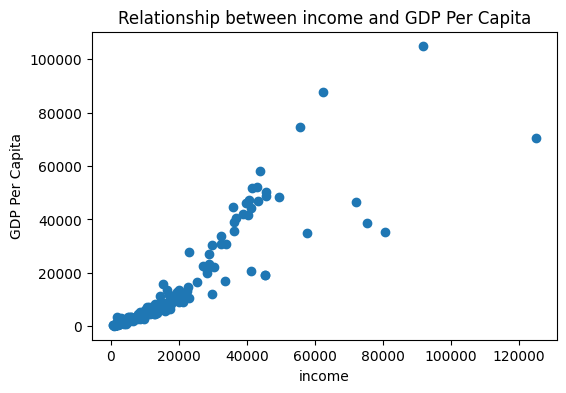

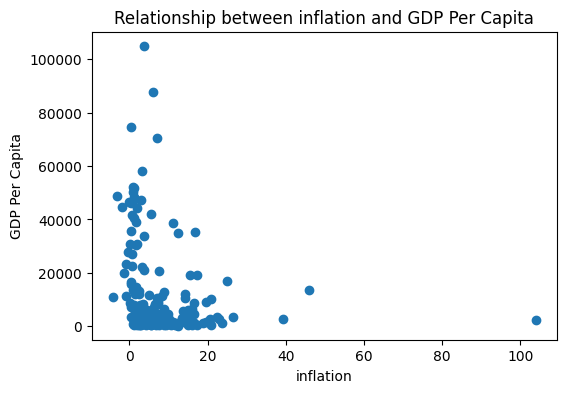

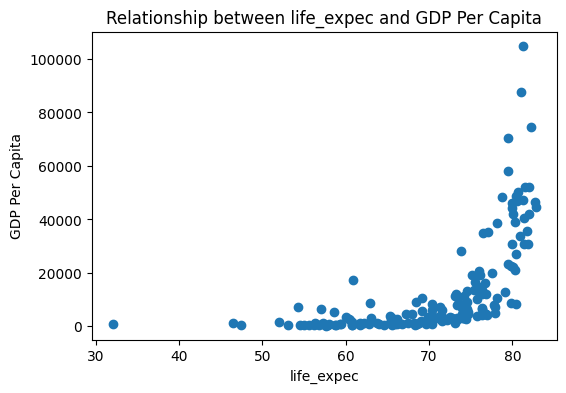

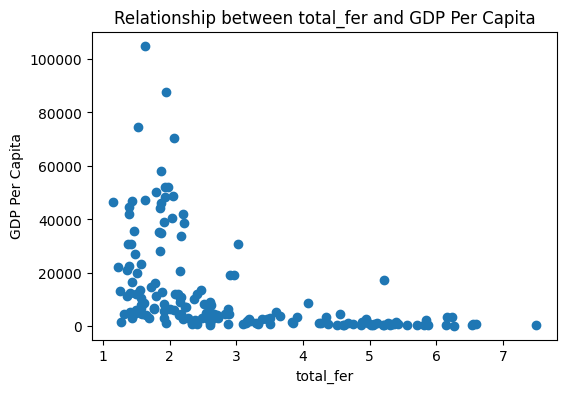

In [14]:
# Explore the continuous independent features against gdpp using scatter plots.
ind_con_features = country_data.drop(columns=['gdpp'])
for feature in ind_con_features.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(country_data[feature], country_data['gdpp'])
    plt.xlabel(feature)
    plt.ylabel('GDP Per Capita')
    plt.title(f'Relationship between {feature} and GDP Per Capita')
    plt.show()

The plots that are the most promising for separating into clusters are the ones that form distinct patterns or groups. Looking at the graphs above, the pairs that are good for clustering are child_mort and gdpp, total_fer and gdpp, income and gdpp, inflation and gdpp and life_expec and gdpp.

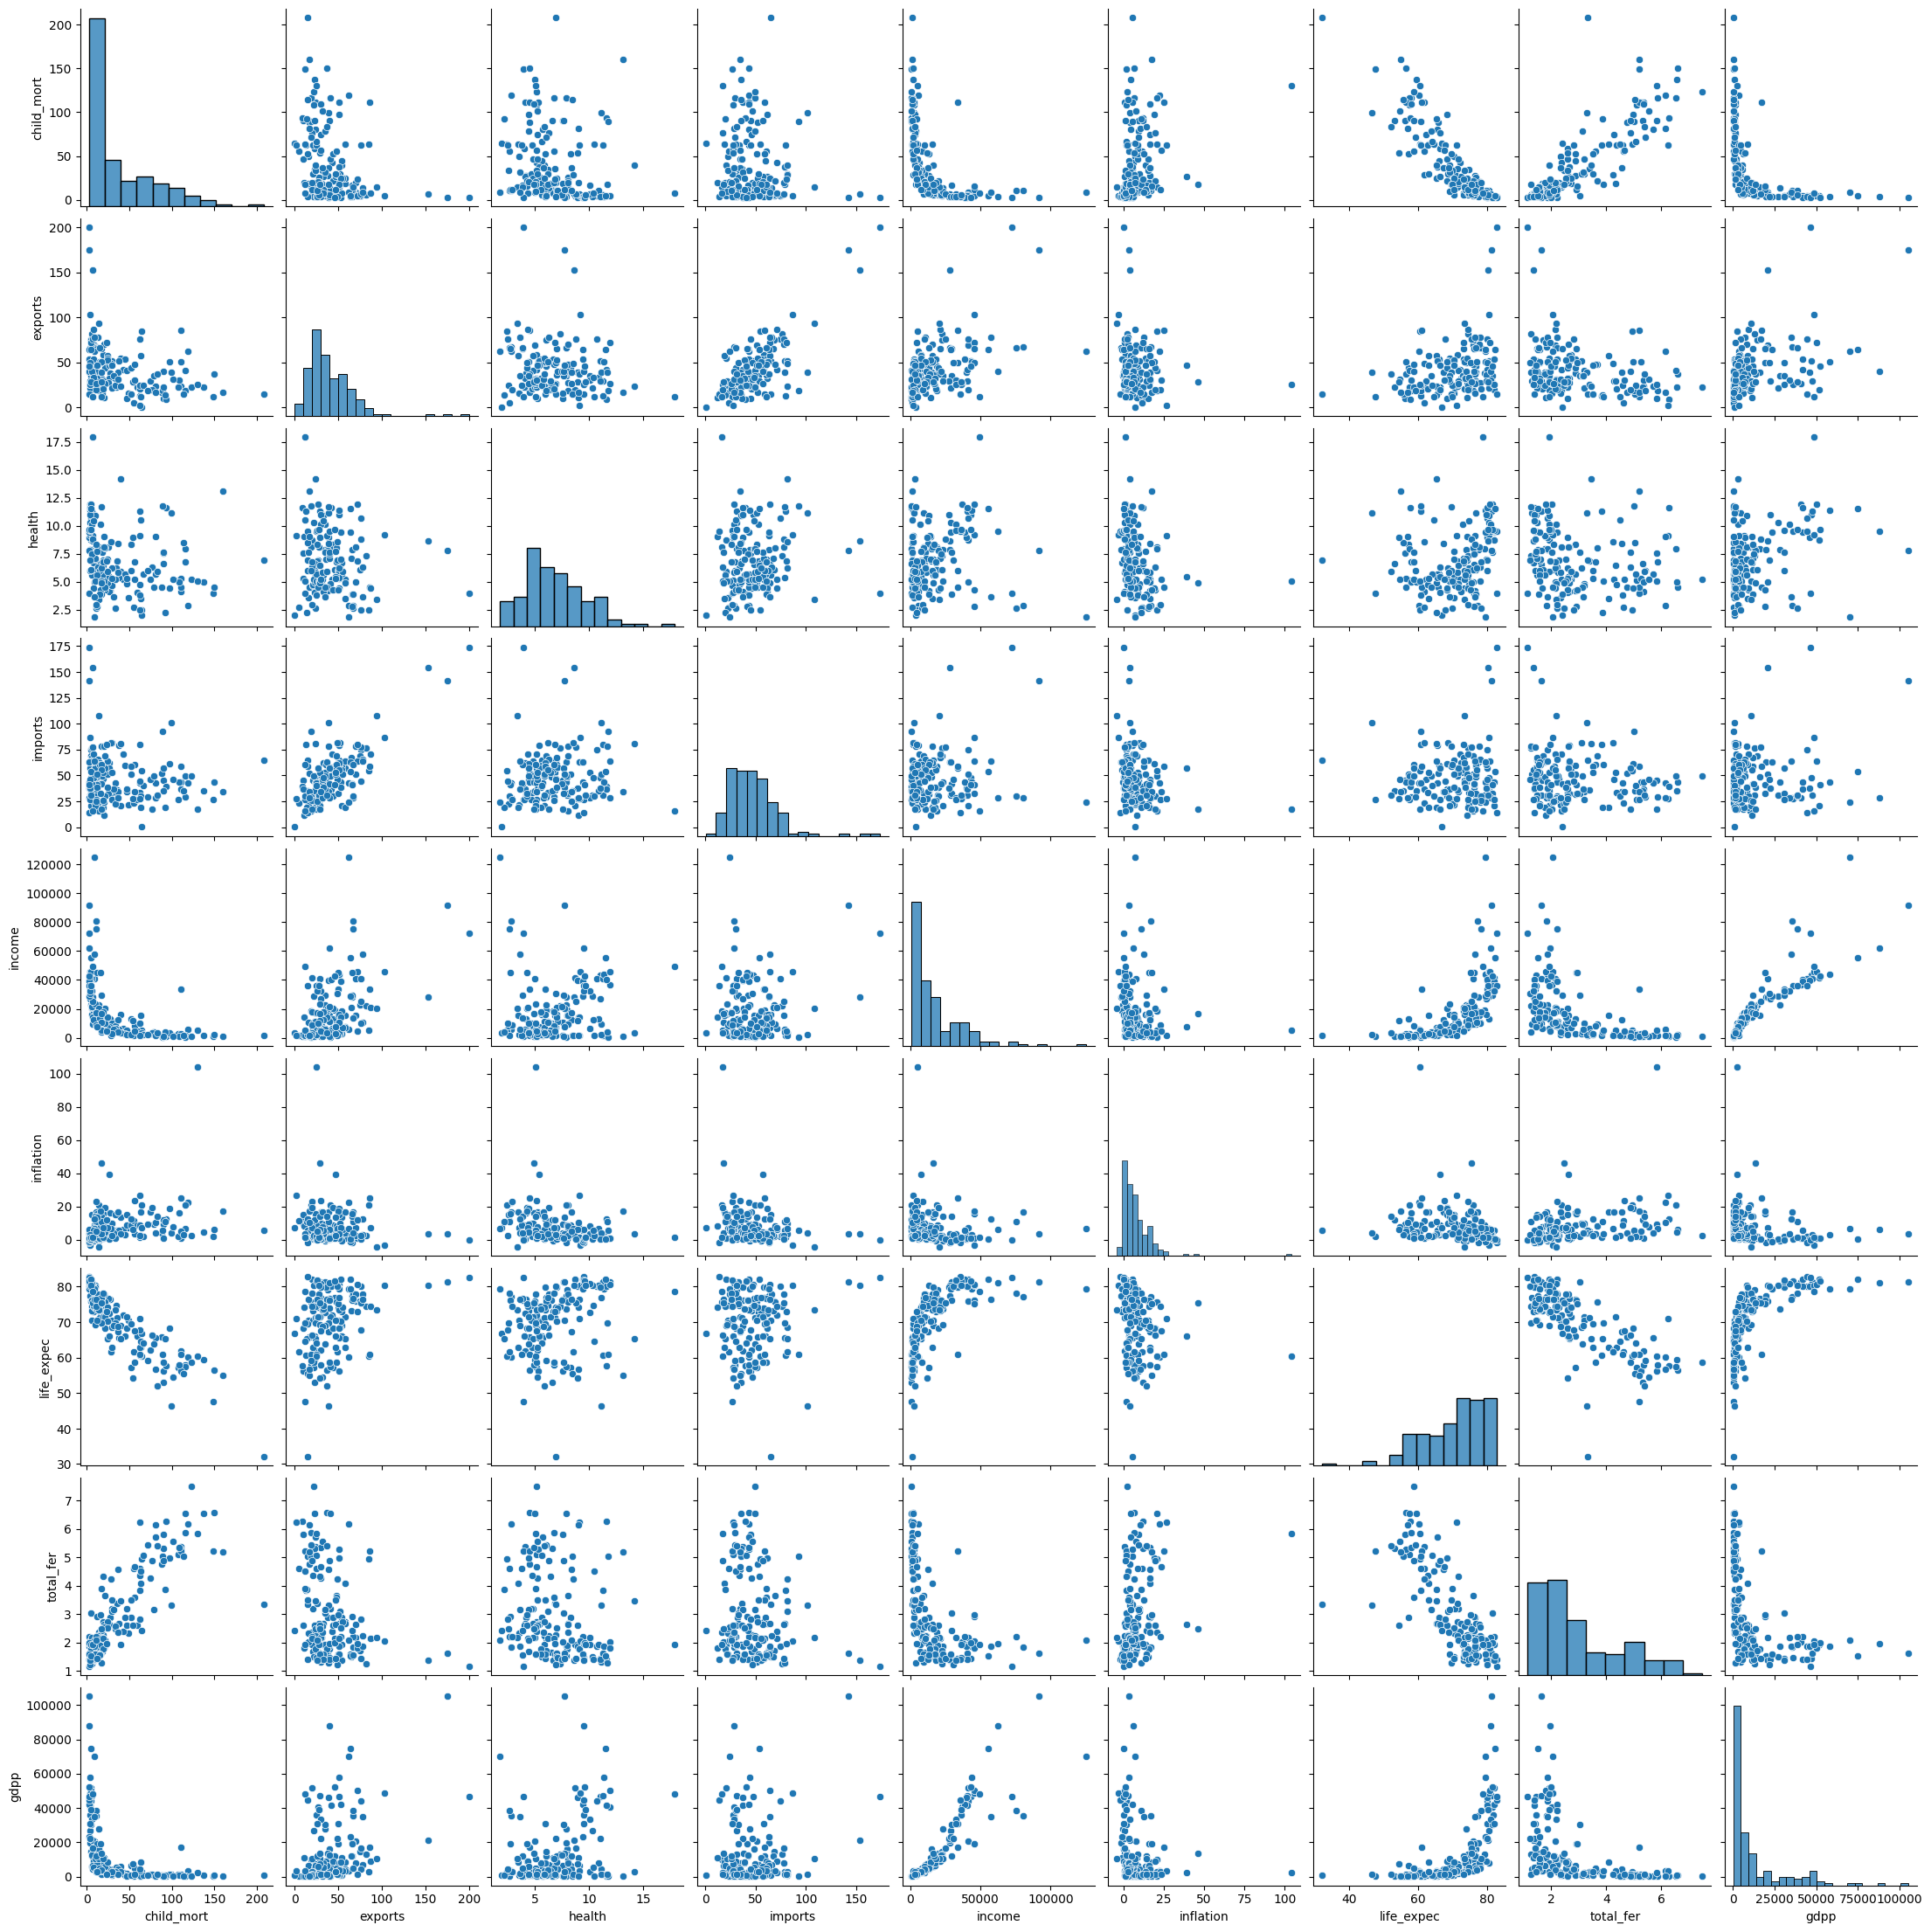

In [15]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(data=country_data)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [10]:
# Normalise the data using MinMaxScaler
# Judging by the pairplot above, none of the variables seeme to follow the Gaussian distribution
# Hence, to scale the data, normalisation is the appropriate method
# import library
from sklearn.preprocessing import MinMaxScaler

# Initialise the scaler
scaler = MinMaxScaler()

# Normalise the data
data_scaled = scaler.fit_transform(country_data)

# Converting the data into a dataframe and naming it df_scaled
df_scaled = pd.DataFrame(data_scaled, columns=country_data.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

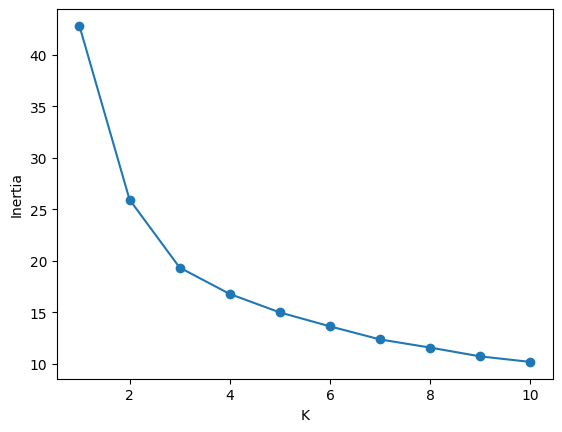

In [11]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.savefig('/Users/ella/Desktop/DS/elbow_method.png')
    plt.show()

# Plot elbow curve using scaled dataset
elbow_Kmeans(df_scaled)

The graph suggests that the best K number is between 3 to 4.

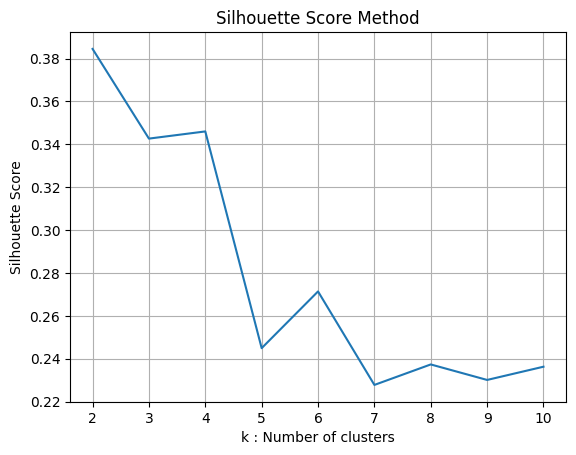

In [13]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.savefig('/Users/ella/Desktop/DS/silhouette_score_method.png')
plt.show()

Silhouette score runs between -1 and 1 and essentially, the closer it is to 1 the better the clusters are defined. In this graph, the optimal k number would be where the graph peaks or where it is closest to 1, shich is k = 2

Based on the elbow and silhouette score method choose a value for K.

Based on the two methods, I have decided to go with k = 2.

## Fitting a K-Means Model with the selected K value

In [14]:
# Remember to set the random_state to rseed
# Prepare data for clusterinG
X = df_scaled.drop(columns=['gdpp'])

kmeans_2 = KMeans(n_clusters = 2, random_state=rseed)
kmeans_2.fit(X)
y_pred = kmeans_2.predict(X)
sil_score = silhouette_score(df_scaled, y_pred)
print(f'The silhouette score for k = 2 is {sil_score}')

The silhouette score for k = 2 is 0.389056713087713


In [15]:
# Count the number of records in each cluster
cluster_count = np.bincount(y_pred)
print(f'The cluster count is: {cluster_count}')


The cluster count is: [ 49 118]


In [16]:
# Check model performance with the silhouette coefficient
sil_score = silhouette_score(df_scaled, y_pred)
print(f'The silhouette score for k = 2 is {sil_score}')

The silhouette score for k = 2 is 0.389056713087713


## Predictions

In [17]:
# Add the predicted cluster label column to the original dataframe
country_data['Predicted Cluster Labels'] = y_pred
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Predicted Cluster Labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


## Visualisation of clusters

<function matplotlib.pyplot.show(close=None, block=None)>

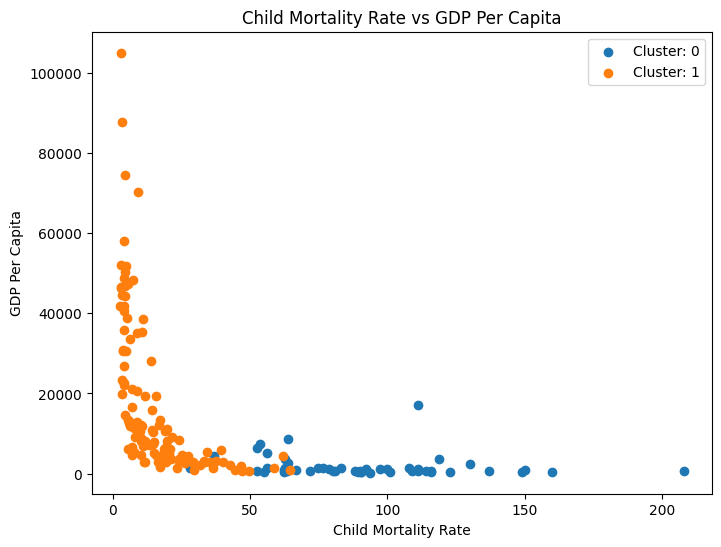

In [18]:
# Visualisation of clusters: child_mort vs gdpp
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for cluster in country_data['Predicted Cluster Labels'].unique():
    clustered_data = country_data[country_data['Predicted Cluster Labels'] == cluster]
    plt.scatter(clustered_data['child_mort'], clustered_data['gdpp'], label=(f'Cluster: {cluster}'))
plt.xlabel('Child Mortality Rate')
plt.ylabel('GDP Per Capita')
plt.title('Child Mortality Rate vs GDP Per Capita')
plt.legend()
plt.savefig('/Users/ella/Desktop/DS/child_mortality_rate_vs_gdp_percapita.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

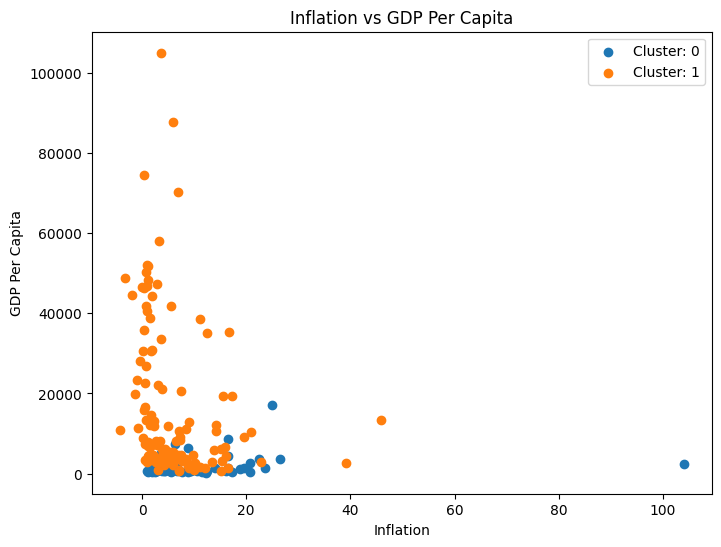

In [19]:
# Visualisation of clusters: inflation vs gdpp
plt.figure(figsize=(8,6))
for cluster in country_data['Predicted Cluster Labels'].unique():
    clustered_data = country_data[country_data['Predicted Cluster Labels'] == cluster]
    plt.scatter(clustered_data['inflation'], clustered_data['gdpp'], label=(f'Cluster: {cluster}'))
plt.xlabel('Inflation')
plt.ylabel('GDP Per Capita')
plt.title('Inflation vs GDP Per Capita')
plt.legend()
plt.savefig('/Users/ella/Desktop/DS/inflation_vs_gdp_percapita.png')
plt.show

## Conclusions


1) Child Mortality Rate vs GDP Per Capita: Looking at this graph, the difference between developed and developing or underdeveloped countries are that developed countries(cluster 1) have a lower child mortality rate and higher GDP per capita; while developing or underdeveloped countries have a higher child mortality rate and lower GDP per capita. In fact, some well developed countries in cluster 1, the ones with the highest levels of GDP per capita have a child mortality rate that is almost 0.

2) Inflation vs GDP per capita: Looking at this graph, the developed countries seem to be represented by cluster 1 and the developing and underdeveloped countries are represented by cluster 2, this is because countries in cluster 1 tend to have a much higher GDP per capita level. Moreover, most countries in cluster one tend to have a lower rate of inflation, which can be indicative of a good stable economy, well-functioning policies and government and the lack of economic shocks; these are some of the features that are missing in developing and underdeveloped countries.